In [24]:
import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math


In [3]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)

imagen = "archivos/enzo.png"
fdj_cropped = Image.open(imagen)
#Usen esta imagen para generar imagenes circulares: https://crop-circle.imageonline.co/

In [5]:
df = pd.read_excel("archivos\Copa de la Liga 2022.xlsx")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\tobia\AppData\Local\Temp\ipykernel_360\2060039534.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_excel("archivos\Copa de la Liga 2022.xlsx")


In [7]:
df.head()

,#,Team,Name,Posicion,Lado,Rating,Appearances,Started,Minutes played,Yellow cards,...,Headed goals,Headed goals per 90,Left foot goals,Right foot goals,Hit woodwork,Hit woodwork per 90,Offsides,Offsides per 90,Penalty conversion,Set piece conversion %
0,1.0,NaN,Brahian Alemán,Mediocampista,ofensivo,7.68,13.0,13.0,1158.0,8.0,...,0.0,0.000000,5.0,1.0,NaN,0.0,20.0,1.554404,NaN,NaN
1,2.0,NaN,Enzo Fernández,Mediocampista,NaN,7.64,15.0,13.0,1179.0,1.0,...,0.0,0.000000,1.0,2.0,NaN,0.0,0.0,0.000000,NaN,NaN
2,3.0,NaN,Alejandro Medina,Arquero,0,7.6,4.0,4.0,360.0,0.0,...,0.0,0.000000,0.0,3.0,NaN,0.0,0.0,0.000000,NaN,NaN
3,4.0,NaN,Franco Cristaldo,Mediocampista,0,7.57,14.0,13.0,1107.0,2.0,...,1.0,0.081301,0.0,4.0,NaN,0.0,0.0,0.000000,NaN,NaN
4,5.0,NaN,Martín Ojeda,Extremo,0,7.56,14.0,14.0,1254.0,0.0,...,0.0,0.000000,5.0,5.0,NaN,0.0,0.0,0.000000,NaN,NaN


In [9]:
df[df["Name"] == "Enzo Fernández"]

,#,Team,Name,Posicion,Lado,Rating,Appearances,Started,Minutes played,Yellow cards,...,Headed goals,Headed goals per 90,Left foot goals,Right foot goals,Hit woodwork,Hit woodwork per 90,Offsides,Offsides per 90,Penalty conversion,Set piece conversion %
1,2.0,NaN,Enzo Fernández,Mediocampista,NaN,7.64,15.0,13.0,1179.0,1.0,...,0.0,0.0,1.0,2.0,NaN,0.0,0.0,0.0,NaN,NaN


In [19]:
df[df['Posicion'] == 'Mediocampista']['Minutes played'].describe()

count     159.000000
mean      575.937107
std       364.482635
min         3.000000
25%       272.000000
50%       510.000000
75%       884.500000
max      1350.000000
Name: Minutes played, dtype: float64

In [26]:
medios = df[(df['Posicion'] == 'Mediocampista') & (df['Minutes played'] > 400)]
medios.head()

,#,Team,Name,Posicion,Lado,Rating,Appearances,Started,Minutes played,Yellow cards,...,Headed goals,Headed goals per 90,Left foot goals,Right foot goals,Hit woodwork,Hit woodwork per 90,Offsides,Offsides per 90,Penalty conversion,Set piece conversion %
0,1.0,NaN,Brahian Alemán,Mediocampista,ofensivo,7.68,13.0,13.0,1158.0,8.0,...,0.0,0.000000,5.0,1.0,NaN,0.0,20.0,1.554404,NaN,NaN
1,2.0,NaN,Enzo Fernández,Mediocampista,NaN,7.64,15.0,13.0,1179.0,1.0,...,0.0,0.000000,1.0,2.0,NaN,0.0,0.0,0.000000,NaN,NaN
3,4.0,NaN,Franco Cristaldo,Mediocampista,0,7.57,14.0,13.0,1107.0,2.0,...,1.0,0.081301,0.0,4.0,NaN,0.0,0.0,0.000000,NaN,NaN
24,25.0,NaN,Leonel Miranda,Mediocampista,0,7.24,12.0,12.0,980.0,3.0,...,1.0,0.091837,0.0,25.0,NaN,0.0,0.0,0.000000,NaN,NaN
26,27.0,NaN,Nicolás Castro,Mediocampista,ofensivo,7.24,14.0,13.0,1160.0,4.0,...,0.0,0.000000,1.0,27.0,NaN,0.0,0.0,0.000000,NaN,NaN


In [34]:
medios_plot = medios[['Name', 'Total duels won %', 'Fouls per 90', 'Possesion lost per 90','Acc. long balls per 90', 'Acc. Passes per 90', 'Accurate passes %', 'Dribbled past per 90', 'Tackles per 90', 'Interceptions per 90', 'Clearances per 90','Key passes per 90', 'Total shots per 90']].reset_index(drop=True)
medios_plot

,Name,Total duels won %,Fouls per 90,Possesion lost per 90,Acc. long balls per 90,Acc. Passes per 90,Accurate passes %,Dribbled past per 90,Tackles per 90,Interceptions per 90,Clearances per 90,Key passes per 90,Total shots per 90
0,Brahian Alemán,59.20,0.932642,23.005181,3.963731,25.025907,74.02,0.777202,1.787565,1.088083,1.787565,2.409326,3.031088
1,Enzo Fernández,50.72,1.068702,16.793893,4.885496,61.679389,83.56,1.145038,2.290076,0.839695,0.229008,2.595420,2.824427
2,Franco Cristaldo,55.13,0.650407,19.024390,3.739837,37.804878,81.15,1.300813,2.601626,0.975610,0.243902,3.008130,1.707317
3,Leonel Miranda,47.79,2.112245,15.612245,2.846939,50.602041,83.36,1.285714,2.112245,0.734694,0.275510,1.744898,2.020408
4,Nicolás Castro,55.81,1.862069,18.310345,2.017241,23.431034,72.25,1.318966,3.646552,1.086207,0.620690,1.784483,2.094828
5,Fernando Zuqui,50.00,0.988024,21.646707,2.694611,26.047904,67.76,1.347305,2.245509,0.538922,1.347305,2.335329,0.808383
6,Sebastian Prediger,65.45,1.275168,10.738255,2.953020,41.476510,83.63,1.342282,3.691275,1.543624,3.288591,0.402685,0.604027
7,Óscar Romero,62.03,0.567227,19.852941,7.373950,47.836134,81.35,1.134454,3.025210,1.323529,0.189076,2.268908,1.701681
8,Emiliano Vecchio,50.63,0.620690,18.124138,3.351724,42.206897,82.73,0.744828,0.620690,0.124138,0.000000,2.731034,1.117241
9,Giuliano Galoppo,52.78,1.798287,12.844910,2.140818,20.808754,71.47,0.856327,2.055186,1.027593,1.198858,0.085633,2.654615


In [38]:
params = list(medios_plot.columns[1:]) 
params

['Total duels won %',
 'Fouls per 90',
 'Possesion lost per 90',
 'Acc. long balls per 90',
 'Acc. Passes per 90',
 'Accurate passes %',
 'Dribbled past per 90',
 'Tackles per 90',
 'Interceptions per 90',
 'Clearances per 90',
 'Key passes per 90',
 'Total shots per 90']

In [37]:
jugador = list(medios_plot[medios_plot["Name"] == "Enzo Fernández"].iloc[0].values[1:])
jugador

[50.72,
 1.0687022900763359,
 16.793893129770993,
 4.885496183206107,
 61.6793893129771,
 83.56,
 1.1450381679389312,
 2.2900763358778624,
 0.8396946564885496,
 0.22900763358778625,
 2.595419847328244,
 2.8244274809160306]

In [39]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(medios_plot[params[x]],jugador[x])))

values

[52, 25, 71, 95, 100, 79, 49, 55, 31, 14, 96, 97]

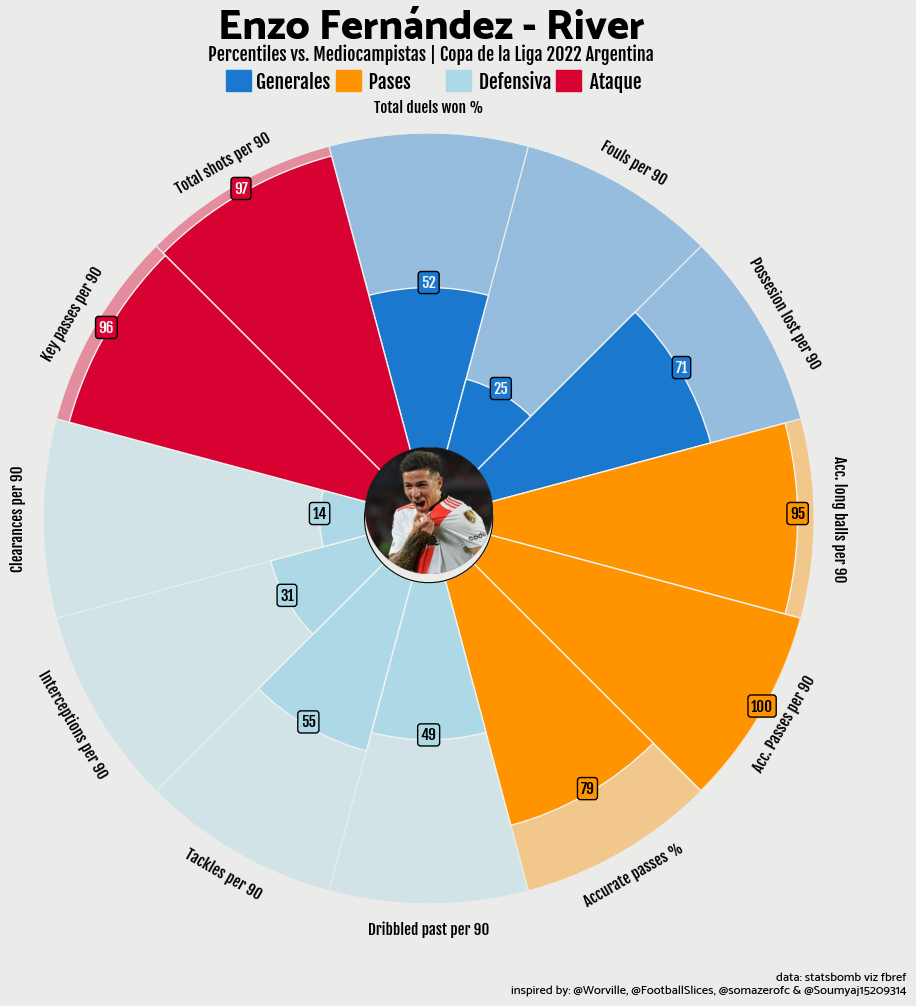

In [43]:
# parameter list --> ya definida

# value list --> ya definido
# The values are taken from the excellent fbref website (supplied by StatsBomb)

# color for the slices and text
slice_colors = ["#1A78CF"] * 3 + ["#FF9300"] * 3 + ['lightblue'] * 4 + ["#D70232"] * 2
text_colors = ["#F2F2F2"] * 3 + ["#000000"] * 7 + ["#F2F2F2"] * 2

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=robotto_regular.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=robotto_regular.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Enzo Fernández - River", size=30,
    ha="center", fontproperties=catamaran.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentiles vs. Mediocampistas | Copa de la Liga 2022 Argentina",
    size=13,
    ha="center", fontproperties=robotto_regular.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=catamaran2.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Generales         Pases                Defensiva         Ataque", size=14,
    fontproperties=robotto_regular.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.42, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.53, 0.9225), 0.025, 0.021, fill=True, color="lightblue",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.64, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.44, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()